In [2]:
import paddle
print(paddle.__version__)

2.3.2


In [ ]:
from paddle.vision.transforms import Compose, Normalize

transform = Compose([Normalize(mean=[127.5],
                               std=[127.5],
                               data_format='CHW')])
# 使用transform对数据集做归一化
print('download training data and load training data')
train_dataset = paddle.vision.datasets.MNIST(mode='train', transform=transform)
test_dataset = paddle.vision.datasets.MNIST(mode='test', transform=transform)
print('load finished')

train_data0 label is: [5]


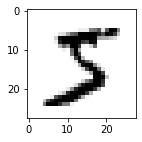

In [4]:
import numpy as np
import matplotlib.pyplot as plt
train_data0, train_label_0 = train_dataset[0][0],train_dataset[0][1]
train_data0 = train_data0.reshape([28,28])
plt.figure(figsize=(2,2))
plt.imshow(train_data0, cmap=plt.cm.binary)
print('train_data0 label is: ' + str(train_label_0))


In [5]:
import paddle.nn.functional as F
class LeNet(paddle.nn.Layer):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = paddle.nn.Conv2D(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=2)
        self.max_pool1 = paddle.nn.MaxPool2D(kernel_size=2,  stride=2)
        self.conv2 = paddle.nn.Conv2D(in_channels=6, out_channels=16, kernel_size=5, stride=1)
        self.max_pool2 = paddle.nn.MaxPool2D(kernel_size=2, stride=2)
        self.linear1 = paddle.nn.Linear(in_features=16*5*5, out_features=120)
        self.linear2 = paddle.nn.Linear(in_features=120, out_features=84)
        self.linear3 = paddle.nn.Linear(in_features=84, out_features=10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.max_pool1(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.max_pool2(x)
        x = paddle.flatten(x, start_axis=1,stop_axis=-1)
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        x = F.relu(x)
        x = self.linear3(x)
        return x


In [8]:
from paddle.metric import Accuracy
model = paddle.Model(LeNet())   # 用Model封装模型
optim = paddle.optimizer.Adam(learning_rate=0.001, parameters=model.parameters())
# 配置模型
model.prepare(
    optim,
    paddle.nn.CrossEntropyLoss(),
    Accuracy()
    )

RuntimeError: (PreconditionNotMet) The third-party dynamic library (cudnn64_7.dll) that Paddle depends on is not configured correctly. (error code is 126)
  Suggestions:
  1. Check if the third-party dynamic library (e.g. CUDA, CUDNN) is installed correctly and its version is matched with paddlepaddle you installed.
  2. Configure third-party dynamic library environment variables as follows:
  - Linux: set LD_LIBRARY_PATH by `export LD_LIBRARY_PATH=...`
  - Windows: set PATH by `set PATH=XXX; (at ..\paddle\phi\backends\dynload\dynamic_loader.cc:303)


In [7]:
# 训练模型
model.fit(train_dataset,
        epochs=2,
        batch_size=64,
        verbose=1
        )


NameError: name 'model' is not defined